In [5]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from argparse import Namespace
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
'''Definition'''

MAGNITUDE = True
SEED = 0
np.random.seed(SEED)
pca_2d = PCA(n_components=2)
scaler = StandardScaler() 
def load_data(data_dir, return_mag=True):
    data = scipy.io.loadmat(data_dir)
    d, t,r = data['data'], data['target'],data['gases_ratios']
    r = r[:, -1].reshape(-1, 1)
    if return_mag:
        d = np.abs(d)
    else:
        dreal = np.real(d)
        dimg = np.imag(d)
        d = np.concatenate([dreal, dimg], axis=1)
    return d.astype(np.float32), t.astype(np.float32),r.astype(np.float32)




Loading the training data and the test data !

In [6]:
import numpy as np
ALL_TRAIN_X = []
ALL_TRAIN_Y = []
ALL_TEST_X = []
ALL_TEST_Y = []
ACCORDING_DISTANCES = []
for i in range(0,51,10):
    if i<10:
        DATA_DIR_i = f"train_SNR_140_samples2500/train_distance_0{1}.mat"
    else:
        DATA_DIR_i = f"train_SNR_140_samples2500/train_distance_{i}.mat"
    ACCORDING_DISTANCES.append(Namespace(**scipy.io.loadmat(DATA_DIR_i)).distance)
    f, l,r = load_data(DATA_DIR_i, MAGNITUDE)
    ALL_TRAIN_X.append(f)  
    ALL_TRAIN_Y.append(l)
    ALL_TEST_X.append(f)
    ALL_TEST_Y.append(l)
# print(ACCORDING_DISTANCES)
# print(ACCORDING_DISTANCES[0].mean)
ACCORDING_DISTANCES =[int(np.mean(i)) for i in ACCORDING_DISTANCES]
print(ACCORDING_DISTANCES)
ALL_TEST_X = np.array(ALL_TEST_X)
ALL_TEST_Y = np.array(ALL_TEST_Y)
ALL_TRAIN_X = np.array(ALL_TRAIN_X)
ALL_TRAIN_Y = np.array(ALL_TRAIN_Y)
print(ALL_TRAIN_X.shape)
print(ALL_TRAIN_Y.shape)
print(ALL_TEST_X.shape)
print(ALL_TEST_Y.shape)

[1, 10, 20, 30, 40, 50]
(6, 2500, 256)
(6, 2500, 1)
(6, 2500, 256)
(6, 2500, 1)


In [ ]:
import numpy as np
RES = [] # expected to be of dimensions (21,100)
# ALL_X_CUM = np.empty((0, ALL_TRAIN_X[0].shape[1]))
# ALL_Y_CUM = np.empty((0, ALL_TRAIN_Y[0].shape[1]))
for i in range(0,10):
    # if ALL_X_CUM.size == 0: 
    #     ALL_X_CUM = ALL_TRAIN_X[i] 
    # else:
    #     ALL_X_CUM = np.concatenate((ALL_X_CUM, ALL_TRAIN_X[i]), axis=0)  
    # if ALL_Y_CUM.size == 0:
    #     ALL_Y_CUM = ALL_TRAIN_Y[i]
    # else:
    #     ALL_Y_CUM = np.concatenate((ALL_Y_CUM, ALL_TRAIN_Y[i]), axis=0)

    X_train = ALL_TRAIN_X[i]
    y_train = ALL_TRAIN_Y[i].squeeze()
    X_train_sc = scaler.fit_transform(X_train)
    X_train_sc_pca_2 = pca_2d.fit_transform(X_train_sc)
    LOG_2 = LogisticRegression()
    LOG_2.fit(X_train_sc, y_train) 
    
    X_test = ALL_TEST_X[i]
    y_test = ALL_TEST_Y[i].squeeze()
    X_test_sc = scaler.transform(X_test)
    X_test_sc_pca_2 = pca_2d.transform(X_test_sc)
    acc_test_LOG_2 = accuracy_score(y_test, LOG_2.predict(X_test_sc))
    RES.append(acc_test_LOG_2)
x = np.arange(start=0, stop=101, step=10)

Actual Drawings!

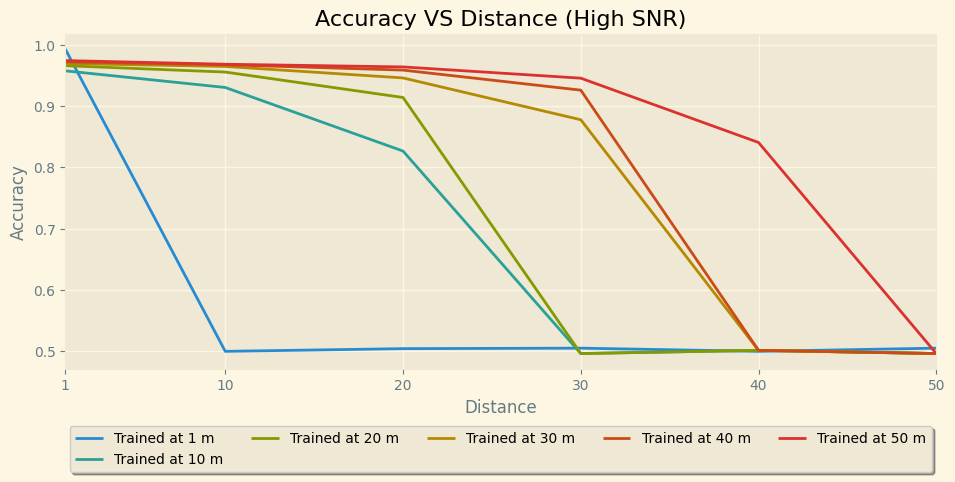

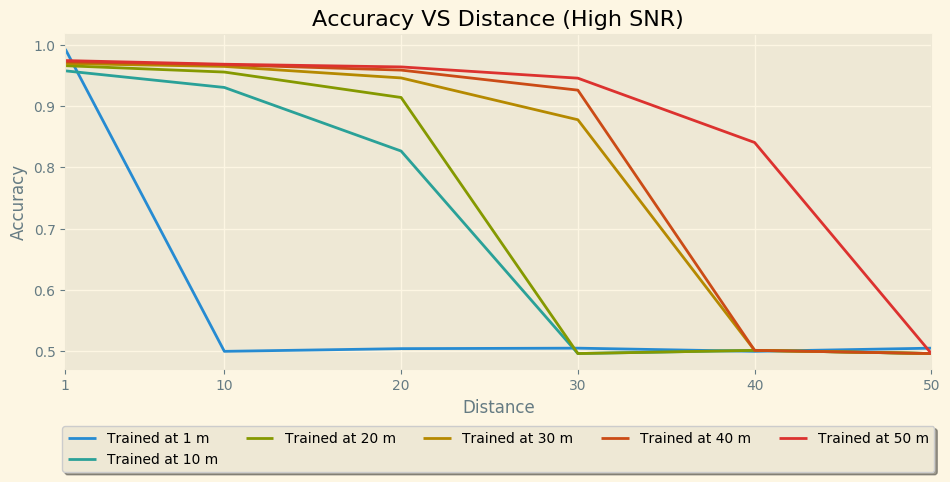

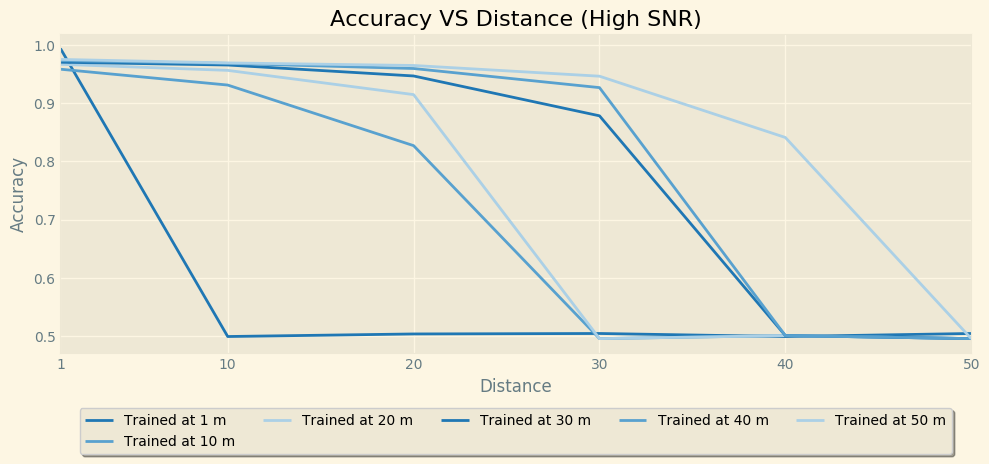

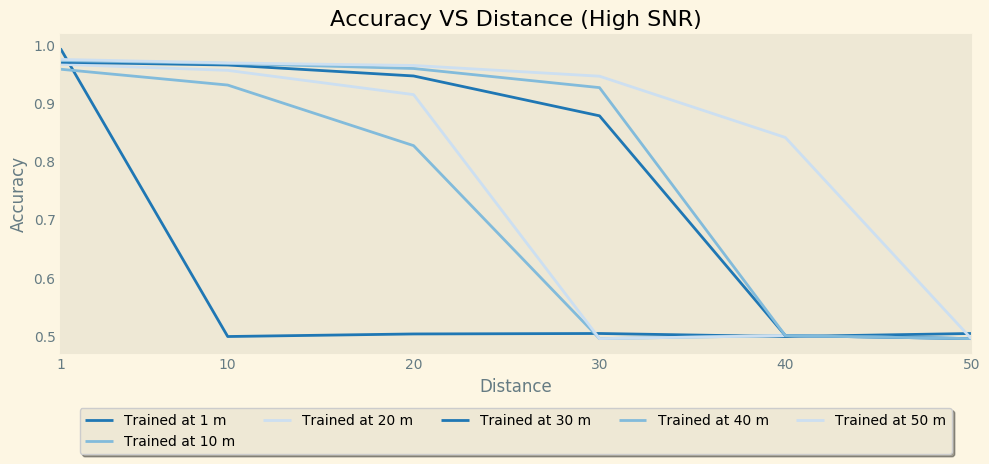

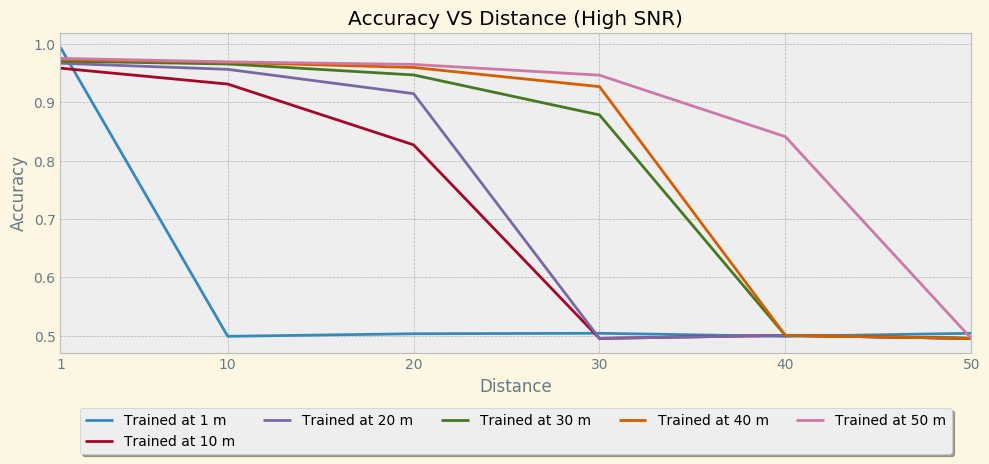

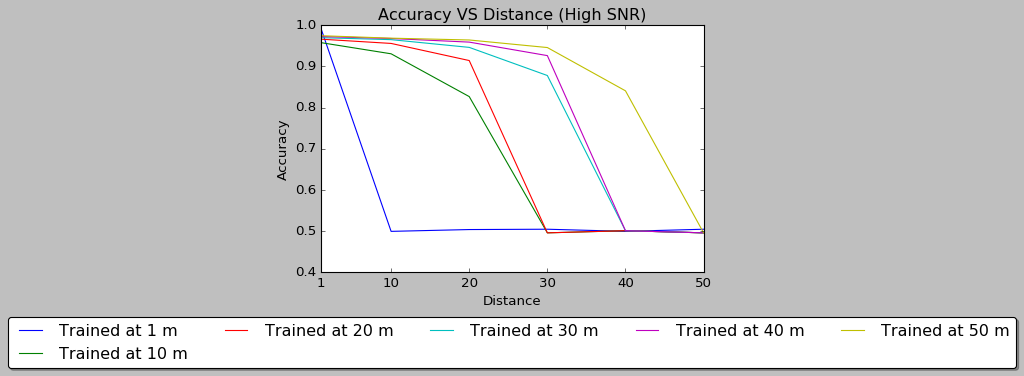

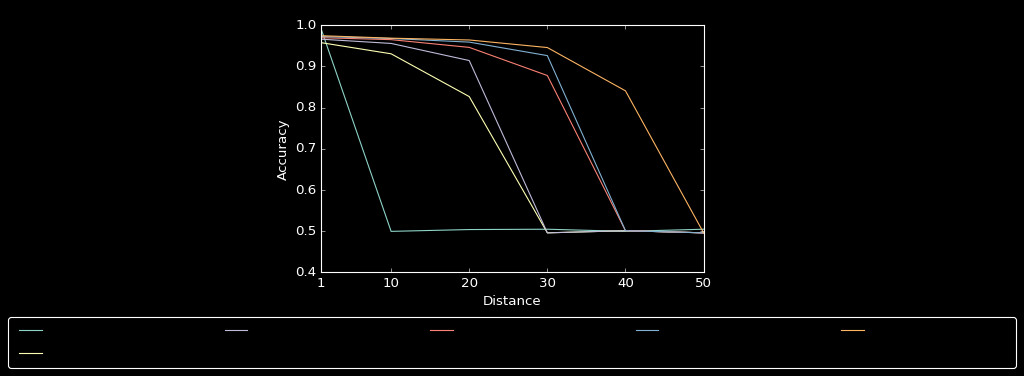

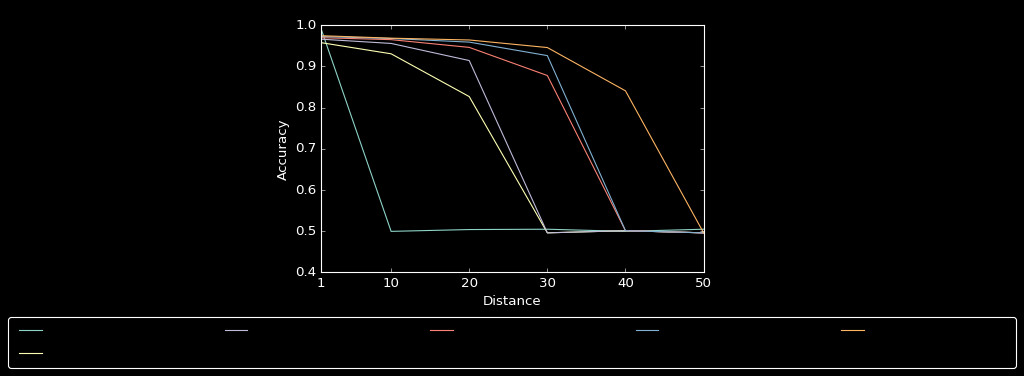

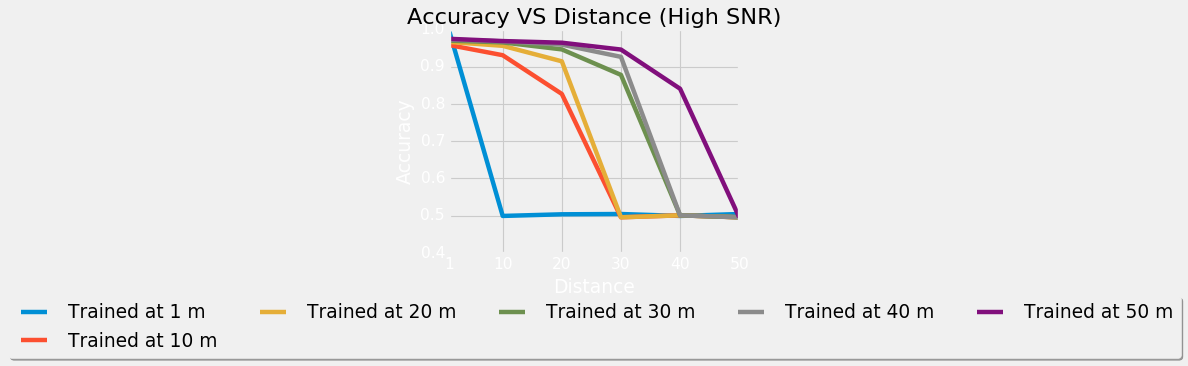

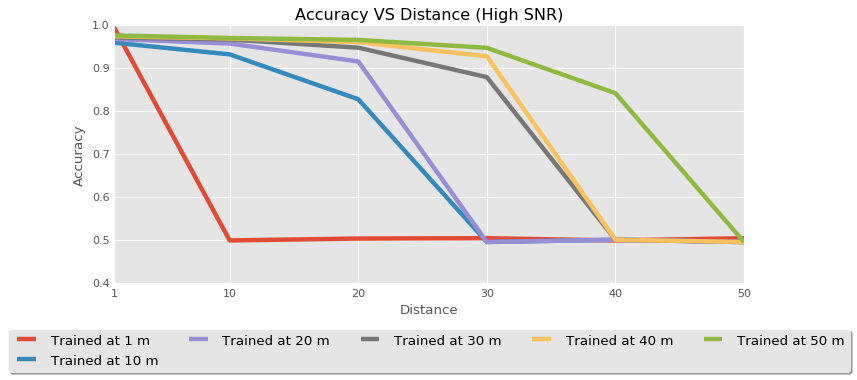

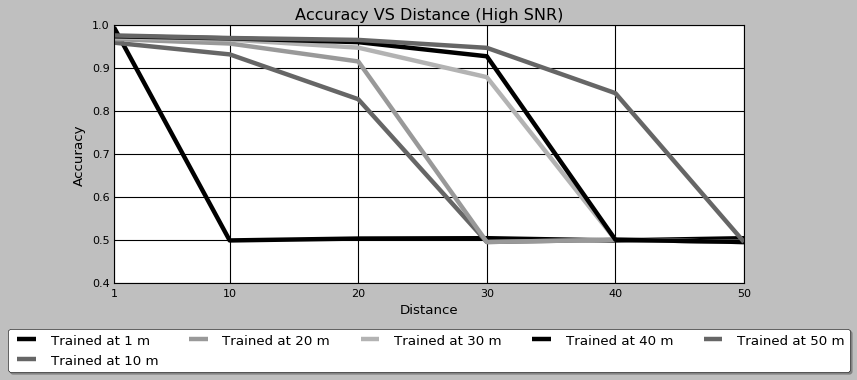

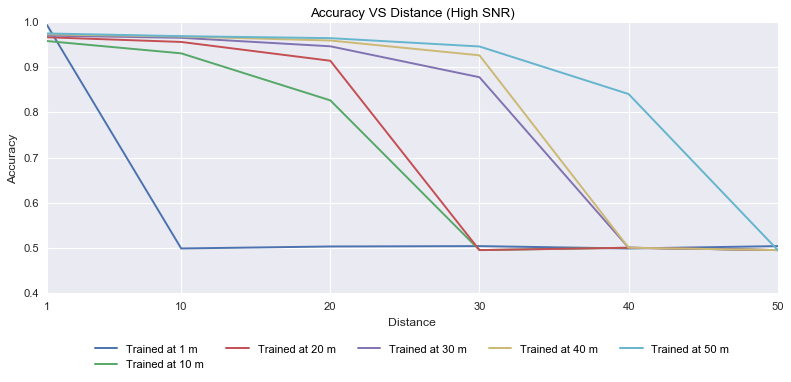

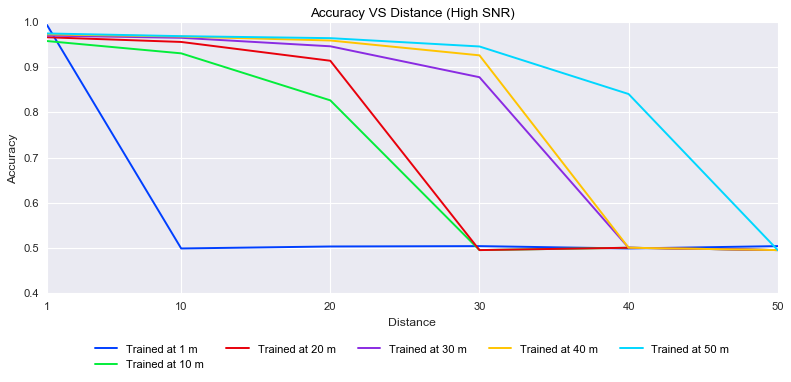

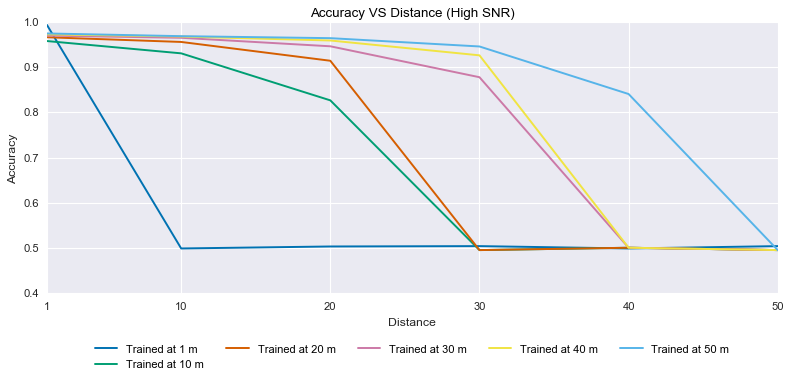

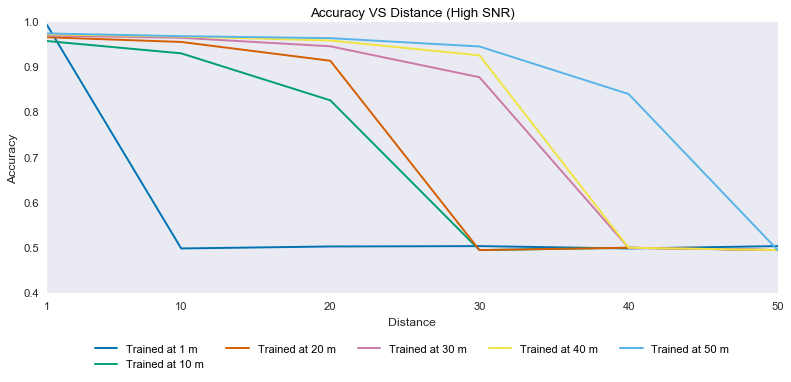

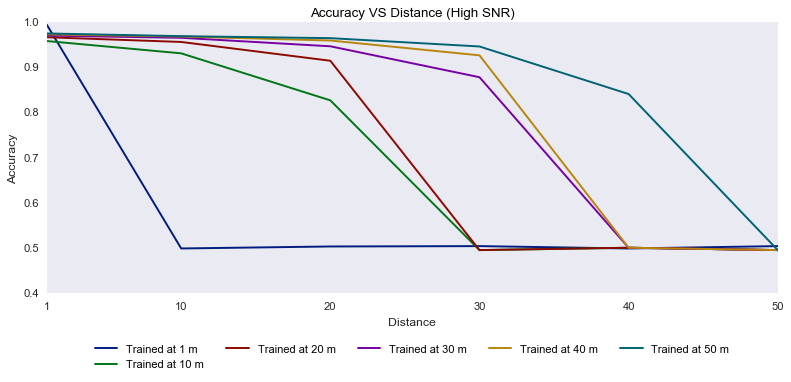

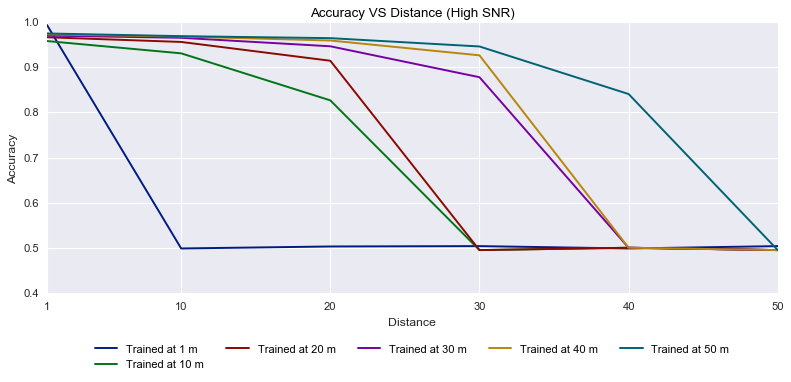

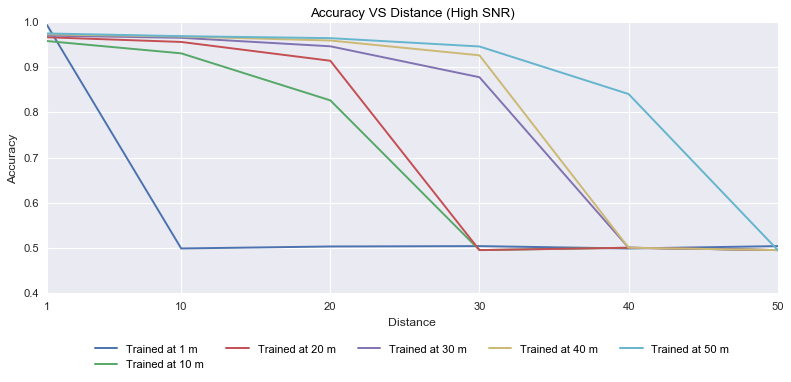

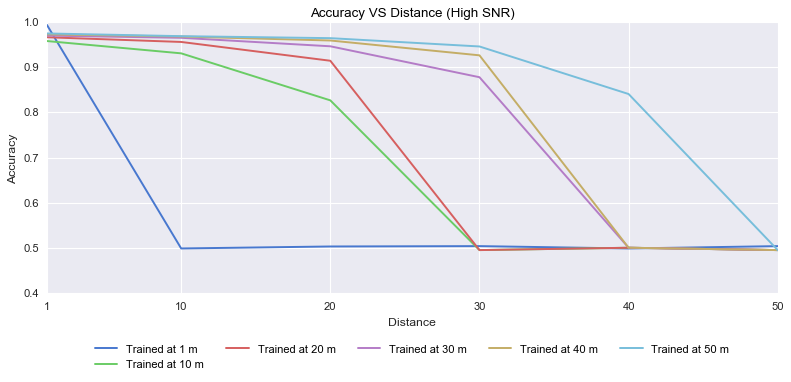

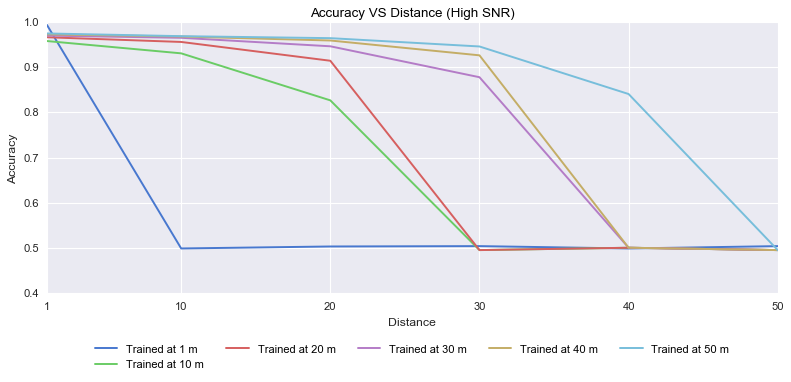

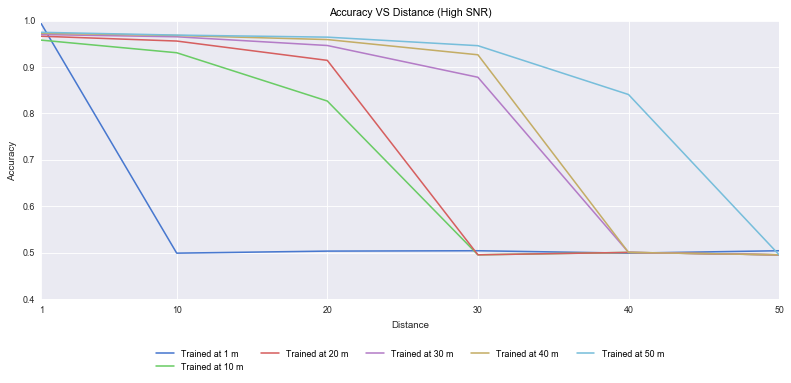

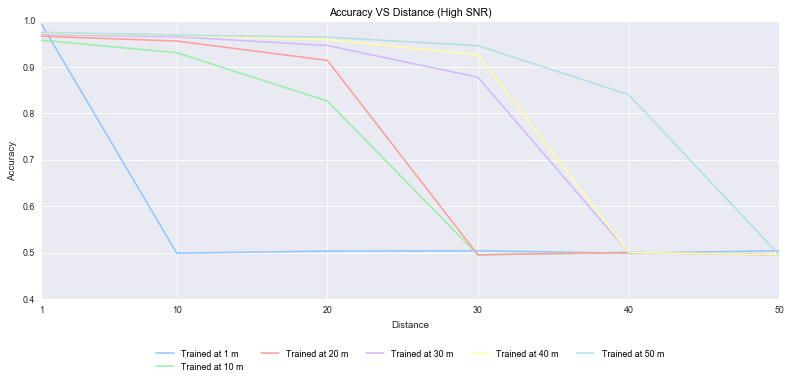

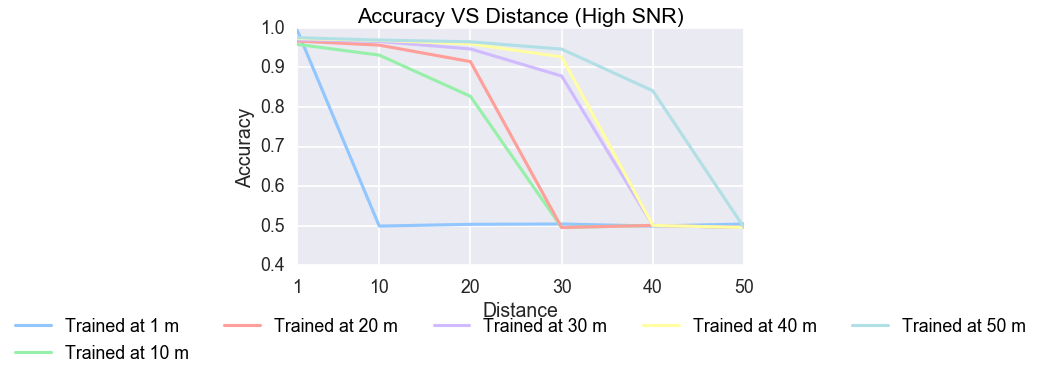

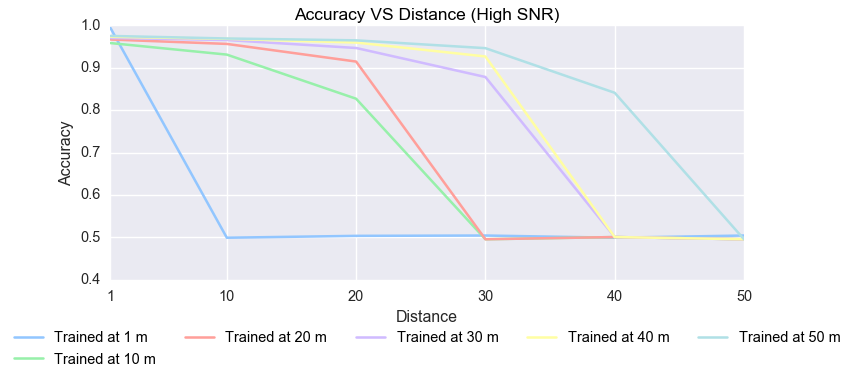

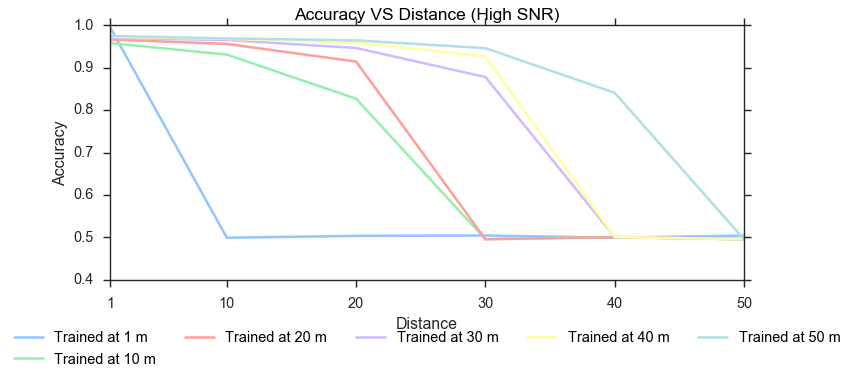

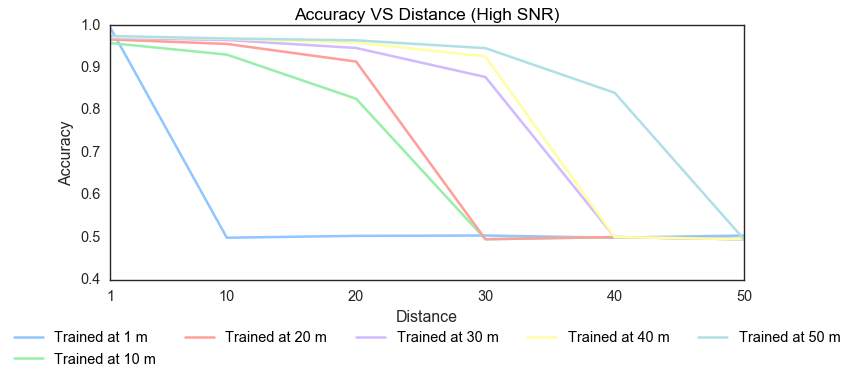

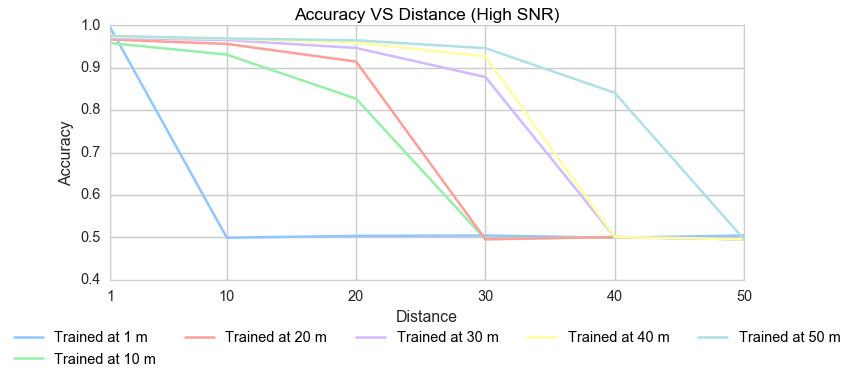

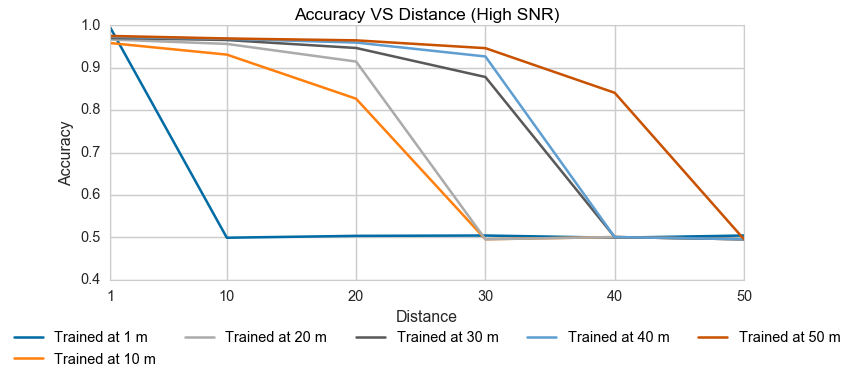

In [ ]:
plt.plot(x,RES)